# Autoencoders

Entregable: Implementación de un autoencoder para el conjunto de datos Fashion MNIST usando una red convolucional

## 1. Importar librerías

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## 2. Carga de datos

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


### 2.1 Normalización de datos

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 2.2 Visualización de algunas imágenes

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']               

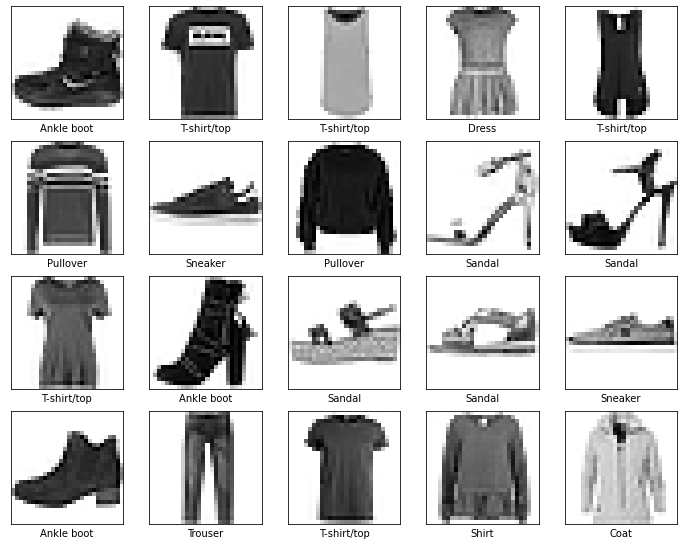

In [6]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 3. Parámetros de la red

In [7]:
input_shape = (28*28,) # 784
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 2

## 4. Encoder

Model: "dense_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
activation (Activation)      (None, 784)               0         
_________________________________________________________________
hidden_layer_1_e (Dense)     (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
hidden_layer_2_e (Dense)     (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
hidden_layer_3_e (Dense)     (None, 32)              

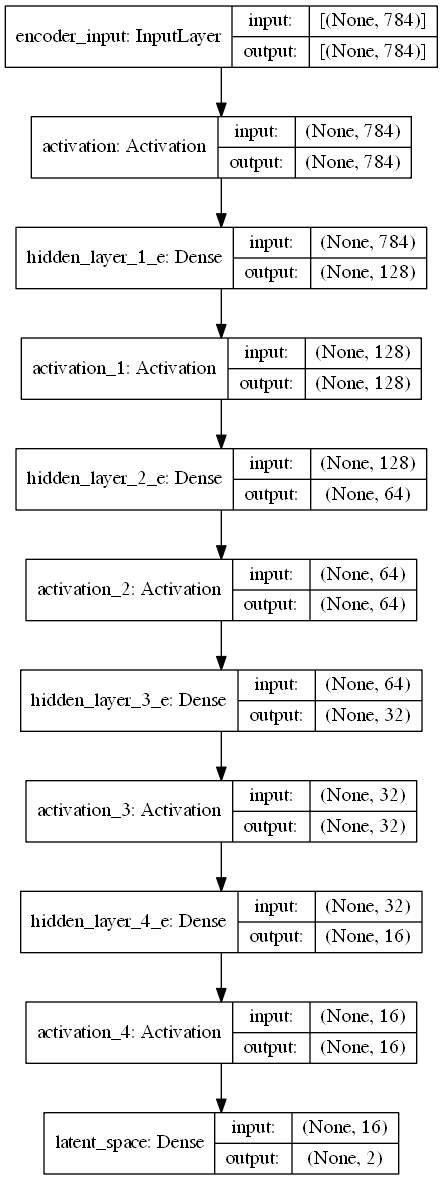

In [8]:
# Define encoder model
inputs = Input(shape=input_shape,name='encoder_input')
x = Activation('relu')(inputs)
x = Dense(intermediate_dim_1, name='hidden_layer_1_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name='hidden_layer_2_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name='hidden_layer_3_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name='hidden_layer_4_e')(x)
x = Activation('relu')(x)
outputs = Dense(latent_dim, name='latent_space')(x)
#outputs = LayerNormalization(axis=1)(x)

encoder = Model(inputs=inputs, outputs=outputs, name='dense_encoder')

encoder.summary()
plot_model(encoder, to_file='encoder_dense_fashion_minist.png', 
           show_shapes=True)

## 5. Decoder

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
hidden_layer_de_4_d (Dense)  (None, 16)                48        
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
hidden_layer_de_3_d (Dense)  (None, 32)                544       
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
hidden_layer_de_2_d (Dense)  (None, 64)                2112      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0   

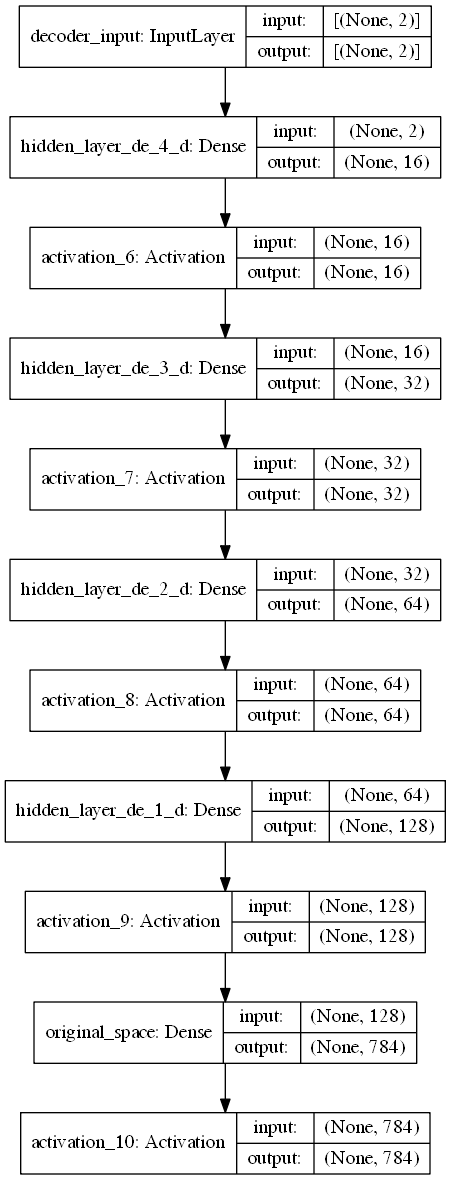

In [9]:
# Define decoder model
latent_input = Input(shape = (latent_dim,), name='decoder_input')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4 , name='hidden_layer_de_4_d')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3 , name='hidden_layer_de_3_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2 , name='hidden_layer_de_2_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1 , name='hidden_layer_de_1_d')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name='original_space')(x)
x = Activation('sigmoid')(x)

decoder = Model (inputs=latent_input, outputs=x, name='decoder')

decoder.summary()
plot_model(decoder, to_file='decoder_dense_fashion_minist.png', 
           show_shapes=True)

## 6. Auto-encoder

Model: "autoencoder_mnist_fashion_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
dense_encoder (Functional)   (None, 2)                 111378    
_________________________________________________________________
decoder (Functional)         (None, 784)               112160    
Total params: 223,538
Trainable params: 223,538
Non-trainable params: 0
_________________________________________________________________


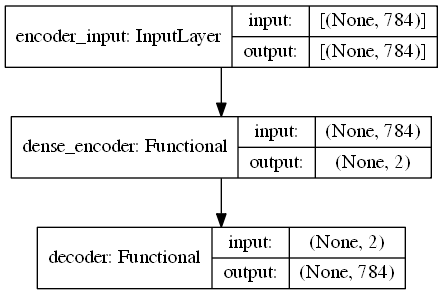

In [10]:
# Autoencoder Model
autoencoder = Model(inputs=inputs, 
                    outputs=decoder(encoder(inputs)),
                    name='autoencoder_mnist_fashion_model')

#Summary
autoencoder.summary()
plot_model(autoencoder,
           to_file='autoencoder_dense_fashion_mnist.png',
           show_shapes=True)

## 7. Entrenamiento

In [11]:
#Compila
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer= optimizer, loss = loss_fn)

In [12]:
# Data
train_images = train_images.reshape(60000, 784).astype("float32")
test_images = test_images.reshape(10000, 784).astype("float32")

epochs = 100
batch_size = 64

In [13]:
#Entrenamiento
history = autoencoder.fit(train_images, train_images, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/100
844/844 [==============================] - 10s 10ms/step - loss: 0.0685 - val_loss: 0.0322
Epoch 2/100
844/844 [==============================] - 4s 5ms/step - loss: 0.0310 - val_loss: 0.0301
Epoch 3/100
844/844 [==============================] - 5s 5ms/step - loss: 0.0295 - val_loss: 0.0293
Epoch 4/100
844/844 [==============================] - 5s 6ms/step - loss: 0.0288 - val_loss: 0.0287
Epoch 5/100
844/844 [==============================] - 5s 6ms/step - loss: 0.0282 - val_loss: 0.0282
Epoch 6/100
844/844 [==============================] - 4s 5ms/step - loss: 0.0276 - val_loss: 0.0280
Epoch 7/100
844/844 [==============================] - 4s 5ms/step - loss: 0.0275 - val_loss: 0.0276
Epoch 8/100
844/844 [==============================] - 4s 5ms/step - loss: 0.0271 - val_loss: 0.0272
Epoch 9/100
844/844 [==============================] - 4s 5ms/step - loss: 0.0269 - val_loss: 0.0272
Epoch 10/100
844/844 [==============================] - 4s 5ms/step - loss: 0.0269 - val_

## 8. Gráfico pérdida

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist.tail()

,loss,val_loss,epoch
95,0.024216,0.024579,95
96,0.024183,0.024635,96
97,0.023944,0.024490,97
98,0.024849,0.025354,98
99,0.024384,0.024494,99


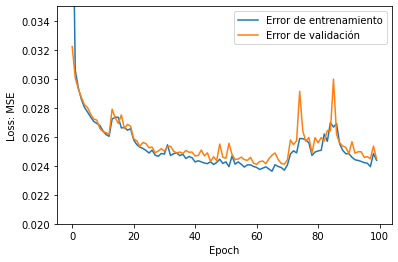

In [15]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss: MSE')
plt.plot(hist['epoch'], hist['loss'],
           label='Error de entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error de validación')
plt.ylim([0.020,0.035])
plt.legend()
plt.show()

## 9. Evaluación externa

In [16]:
autoencoder.evaluate(test_images,test_images) # 0.0244
autoencoder.evaluate(train_images,train_images) # 0.0240

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0240


0.02401628904044628

## 10. Prueba

In [17]:
decoded_imgs_test = autoencoder.predict(test_images)

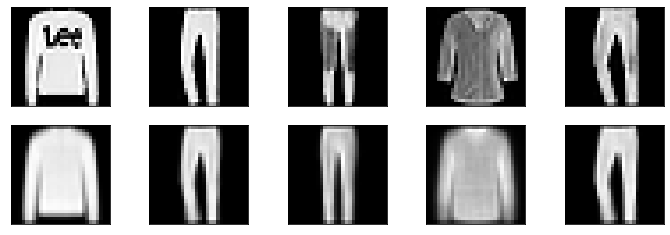

In [18]:
n = 5
plt.figure(figsize=(12, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 11. Representación latente

In [19]:
encoded_images_test = encoder(test_images)
encoded_images_test 

<tf.Tensor: shape=(10000, 2), dtype=float32, numpy=
array([[ -8.042694 ,  -9.644289 ],
       [ 18.282194 , -17.342022 ],
       [ 53.496033 ,  39.05691  ],
       ...,
       [  2.4641876,  -4.0273504],
       [ 30.236786 ,  16.708664 ],
       [-13.096394 , -17.63073  ]], dtype=float32)>

In [20]:
test_images_labels = []

for label_code in test_labels:
  test_images_labels.append(class_names[label_code])

test_images_labels[0:10]

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker']

In [21]:
encoded_dataframe = pd.DataFrame(encoded_images_test.numpy())
encoded_dataframe['label'] = test_images_labels
encoded_dataframe.columns = ['x', 'y', 'label']
encoded_dataframe

,x,y,label
0,-8.042694,-9.644289,Ankle boot
1,18.282194,-17.342022,Pullover
2,53.496033,39.056911,Trouser
3,18.642046,12.499375,Trouser
4,11.419734,-8.031871,Shirt
...,...,...,...
9995,-7.961823,-11.425516,Ankle boot
9996,12.505902,7.839374,Trouser
9997,2.464188,-4.027350,Bag
9998,30.236786,16.708664,Trouser
